In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
mpl.rc('font', family = 'Malgun Gothic')

In [34]:
corona_conf = pd.read_csv('time.csv') # 일별 확진자 누적데이터.csv
corona_conf
# 사회적 거리두기 2020-03-22

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
128,2020-05-27,0,852876,820550,11265,10295,269
129,2020-05-28,0,868666,834952,11344,10340,269
130,2020-05-29,0,885120,849161,11402,10363,269
131,2020-05-30,0,902901,865162,11441,10398,269


In [35]:
policy_date = pd.read_csv('policy.csv') # 정책별 시행/종료 날짜데이터.csv
policy_date

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


In [36]:
# policy_start =  corona['date'] == "2020-03-22"
corona_conf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       133 non-null    object
 1   time       133 non-null    int64 
 2   test       133 non-null    int64 
 3   negative   133 non-null    int64 
 4   confirmed  133 non-null    int64 
 5   released   133 non-null    int64 
 6   deceased   133 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 7.4+ KB


In [37]:
policy_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   policy_id   58 non-null     int64 
 1   country     58 non-null     object
 2   type        58 non-null     object
 3   gov_policy  58 non-null     object
 4   detail      56 non-null     object
 5   start_date  58 non-null     object
 6   end_date    23 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.3+ KB


In [38]:
# 사회적 거리두기 정책 시행 날짜
SDC_date = policy_date[policy_date['gov_policy'] == "Social Distancing Campaign"]
SDC_applydate = SDC_date.iloc[0].start_date
SDC_applydate

'2020-03-22'

In [39]:
# 시행날짜 타입 변경(date) => 1달전, 후 날짜 추출
SDC_applydate_date = datetime.strptime(SDC_applydate,"%Y-%m-%d") # 시행날짜 타입 변경
SDC_be_applydate_date = SDC_applydate_date - relativedelta(months= 1) # 30일 전
SDC_aft_applydate_date = SDC_applydate_date + relativedelta(months= 1) # 30일 후
SDC_be_applydate_date,SDC_aft_applydate_date
SDC_be_applydate = str(SDC_be_applydate_date) # 사회적 거리두기 정책 시행 30 일전 날짜
SDC_aft_applydate = str(SDC_aft_applydate_date) # 사회적 거리두기 정책 시행 30 일후 날짜

In [40]:
# 정책 시행일 30일 전 코로나 누적 확진자 수
SDC_be_applydate = SDC_be_applydate[:10]
policy_be_conf = corona_conf[corona_conf['date'] == SDC_be_applydate]
policy_be_applyconf = policy_be_conf.iloc[0].confirmed
policy_be_applyconf

433

In [41]:
# 정책 시행일 코로나 누적 확진자 수
policy_conf = corona_conf[corona_conf['date'] == SDC_applydate]
policy_applyconf = policy_conf.iloc[0].confirmed
policy_applyconf

8897

In [42]:
# 정책 시행일 30일 후 코로나 누적 확진자 수
SDC_aft_applydate = SDC_aft_applydate[:10]
policy_aft_conf = corona_conf[corona_conf['date'] == SDC_aft_applydate]
policy_aft_applyconf = policy_aft_conf.iloc[0].confirmed
policy_aft_applyconf

10694

In [43]:
# 시행일 전 30일 사이에 확진자 수 =
# 정책 시행일 누적 확진자 수 - 30일 전 누적 확진자 수 
before_conf = policy_applyconf - policy_be_applyconf
before_conf

8464

In [71]:
# 시행일 후 30일 사이에 확진자 수 =
# 정책 시행일 30일 후 누적 확진자 수 - 정책 시행일 누적 확진자 수
after_conf = policy_aft_applyconf - policy_applyconf
after_conf

1797

In [76]:
# 시행 전,후 차이량
change_rate = before_conf - after_conf

In [84]:
total = pd.DataFrame([before_conf,after_conf,change_rate], 
                          index = ['시행전','시행후','차이량'], columns = ['확진자'])
total

,확진자
시행전,8464
시행후,1797
차이량,6667


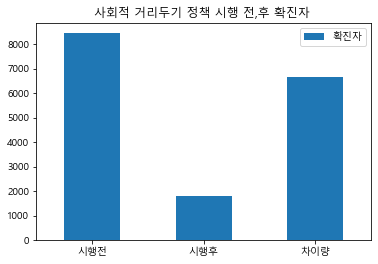

In [94]:
# colors =['red','blue','green']
bar_graph = total.plot(kind='bar', title ="사회적 거리두기 정책 시행 전,후 확진자 ", rot = 0)

plt.show()

In [17]:
# 시각화를 위한 작업
before_conf = np.arange(1,before_conf)
after_conf = np.arange(1,after_conf)
change_rate = np.arange(1,change_rate)

In [114]:
 #사회적 거리두기 정책 시행 30일 전(2020-02-21)  코로나 누적확진자 수


# policy_bef_con_add = 

corona_confirmed.iloc[32]
#  #사회적 거리두기 정책 시행 당일(2020-03-22) 코로나 누적확진자 수 
# policy_day_con_add = corona_confirmed.iloc[62].confirmed
#  #사회적 거리두기 정책 시행 30일 후(2020-04-21) 코로나 누적확진자 수
# policy_aft_con_add = corona_confirmed.iloc[92].confirmed
# # corona.iloc[92]


# # 정책 시행 전 1달간 확진자 수
# bef_policy_day_con - policy_bef_con

date         2020-02-21
time                 16
test              16400
negative          13016
confirmed           204
released             17
deceased              2
Name: 32, dtype: object

c:\users\it-5c\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='confirmed'>

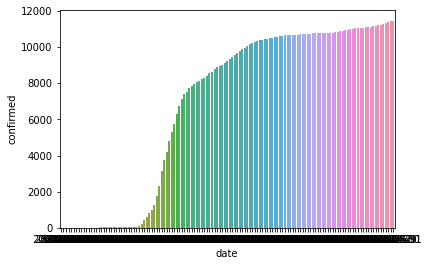

In [6]:
sns.barplot('date','confirmed',data= corona)